<a href="https://colab.research.google.com/github/sakshisubedi/CSE_256_NLP/blob/main/fewshot/imdb_fewshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.7 MB/s eta 0:00:00


In [ ]:
# import:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from datasets import Dataset


In [ ]:
# Install required packages
!pip install sentence_transformers
!pip install setfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=a3252966fe67ecabc2f98d7af7c079c15e511f64f18d44a2bde55738840736c4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import required packages
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('IMDB-Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# prepare data for setfit api
data = data.rename(columns={'review':'text','sentiment':'label_text'})
data['label'] = data['label_text'].apply(lambda x : 1 if x=='positive' else 0)

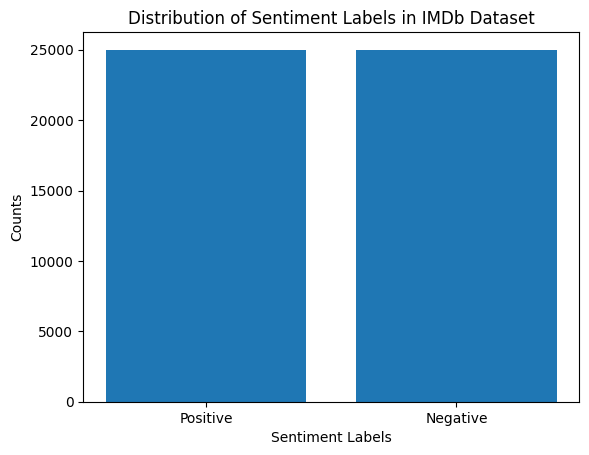

In [ ]:
positive_count = sum(1 for label in data['label'] if label == 1)
negative_count = len(data['label']) - positive_count
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
# Plot the bar plot
plt.bar(labels, counts)
plt.xlabel('Sentiment Labels')
plt.ylabel('Counts')
plt.title('Distribution of Sentiment Labels in IMDB Dataset')
plt.show()

In [ ]:
# train test split
data_train = Dataset.from_pandas( data.iloc[:50,:])
data_eval =  Dataset.from_pandas(data.iloc[50:100,:])

In [ ]:
# loading model
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
batch_size = 8
learning_rate = 2e-05
num_iterations=40
num_epochs=1

In [ ]:
# Create trainer
trainer = SetFitTrainer(
    model = model,
    train_dataset = data_train,
    eval_dataset = data_eval,
    loss_class = CosineSimilarityLoss,
    batch_size = batch_size,
    learning_rate = learning_rate,
    num_iterations = num_iterations,
    num_epochs = num_epochs
)

In [ ]:
import time

# Start the timer
start_time = time.time()

In [ ]:
 # Fine-tune the model on downstream task for 10 epochs
trainer.train()

Generating Training Pairs:   0%|          | 0/40 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 4000
  Num epochs = 1
  Total optimization steps = 500
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
execution_time = time.time() - start_time
execution_time

In [ ]:
# Evaluate model performance on evaluation dataset
performance = trainer.evaluate()
print(performance)

***** Running evaluation *****


{'accuracy': 0.98}


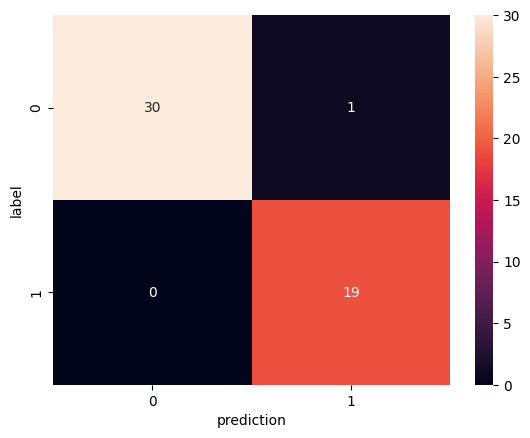

In [ ]:
test_pred = trainer.model.predict(data_eval['text'])

In [ ]:
confusion_mat = confusion_matrix(data_eval['label'], test_pred)
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [ ]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

In [ ]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

In [ ]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if data_eval.iloc[idx]['sentiment'] != y_pred[idx]:
    print(data_eval.iloc[idx]['review'] + "\n\n")
    wrong_predictions += 1

In [ ]:
# printing wrong predictions
wrong_predictions

In [ ]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

In [ ]:
true_positives = confusion_mat[1, 1]
true_negatives = confusion_mat[0, 0]
false_positives = confusion_mat[0, 1]
false_negatives = confusion_mat[1, 0]

# Set the labels for x-axis
labels = ['Positive', 'Negative']

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x, [true_positives, true_negatives], width, label='True')
rects2 = ax.bar(x, [false_positives, false_negatives], width, label='False', bottom=[true_positives, true_negatives])

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of Few Shot Technique using Setfit on IMDB dataset')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

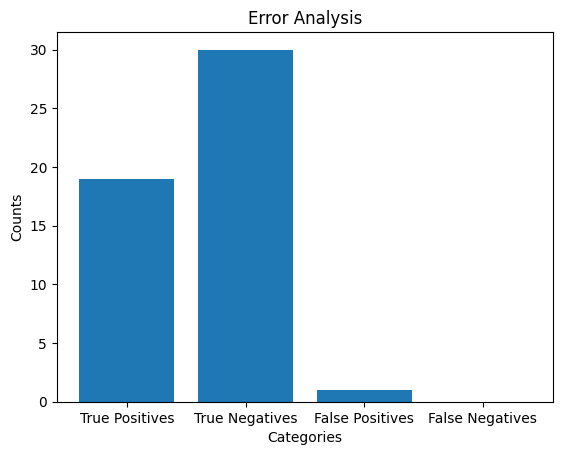

In [ ]:
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']

# Define the counts for each category
counts = [true_positives, true_negatives, false_positives, false_negatives]

# Plot the error analysis results
plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Error Analysis')
plt.show()